In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# !pip install imbalanced_learn
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_csv("E:\Data sets\customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#drop the customerID column as it is not imp
df.drop("customerID",axis=1,inplace=True)

In [8]:
df.shape

(7043, 20)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df1=df.copy()

In [12]:
# TotalCharges column si in string convert it to int
# as at no 488 nothing was available so "COERCE" is used to write NAN over there
df1['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
df1.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# as only 11 null value are there therefore it can be dropped
df1.dropna(inplace=True)

In [17]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# for loop used to get unique values of every column
for i in df1:
    print(i," - ",df1[i].unique())

gender  -  ['Female' 'Male']
SeniorCitizen  -  [0 1]
Partner  -  ['Yes' 'No']
Dependents  -  ['No' 'Yes']
tenure  -  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  -  ['No' 'Yes']
MultipleLines  -  ['No phone service' 'No' 'Yes']
InternetService  -  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  -  ['No' 'Yes' 'No internet service']
OnlineBackup  -  ['Yes' 'No' 'No internet service']
DeviceProtection  -  ['No' 'Yes' 'No internet service']
TechSupport  -  ['No' 'Yes' 'No internet service']
StreamingTV  -  ['No' 'Yes' 'No internet service']
StreamingMovies  -  ['No' 'Yes' 'No internet service']
Contract  -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  -  ['Yes' 'No']
PaymentMethod  -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  -  [

In [20]:
# as "No Internet" service and "no" have the same meaning therefore replace it with "no"
df1.replace('No internet service','No',inplace=True)

In [21]:
# to simply replace yes with 1 and no with 0 
df1.replace({'Yes':1,'No':0,'Female':0,'Male':1},inplace=True)

In [22]:
#all the yes, no and male and female are replaced
for i in df1:
    print(i," - ",df1[i].unique())

gender  -  [0 1]
SeniorCitizen  -  [0 1]
Partner  -  [1 0]
Dependents  -  [0 1]
tenure  -  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  -  [0 1]
MultipleLines  -  ['No phone service' 0 1]
InternetService  -  ['DSL' 'Fiber optic' 0]
OnlineSecurity  -  [0 1]
OnlineBackup  -  [1 0]
DeviceProtection  -  [0 1]
TechSupport  -  [0 1]
StreamingTV  -  [0 1]
StreamingMovies  -  [0 1]
Contract  -  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  -  [1 0]
PaymentMethod  -  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  -  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  -  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  -  [0 1]


In [23]:
# for others directly use get dummies as it may have multiple unique values
final= pd.get_dummies(data=df1,drop_first=True)

In [24]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


# churn according to Tenure

In [25]:
# this helps to find out according to tenure how many cutomers are leaving the network
tenure0 =final[final['Churn']==0].tenure
tenure1 =final[final['Churn']==1].tenure

In [26]:
final[final["Churn"]==1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
8,0,0,1,0,28,1,0,0,1,1,...,1,1,0,0,1,0,0,0,1,0
13,1,0,0,0,49,1,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
7026,0,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
7032,1,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
7034,0,0,0,0,67,1,1,1,1,0,...,1,1,0,0,1,0,0,1,0,0


In [27]:
tenure0

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [28]:
tenure1

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

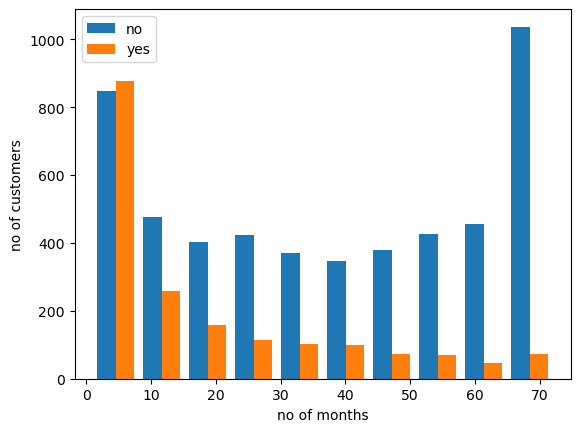

In [29]:
plt.hist([tenure0,tenure1],label=['no','yes'])
plt.legend()
plt.xlabel('no of months')
plt.ylabel('no of customers')
plt.show()

# Churn according to Monthly charges

In [30]:
MonthlyCharges0=final[final['Churn']==0].MonthlyCharges
MonthlyCharges1=final[final['Churn']==1].MonthlyCharges

In [31]:
MonthlyCharges0

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

In [32]:
MonthlyCharges1

2        53.85
4        70.70
5        99.65
8       104.80
13      103.70
         ...  
7021     59.80
7026     44.20
7032     75.75
7034    102.95
7041     74.40
Name: MonthlyCharges, Length: 1869, dtype: float64

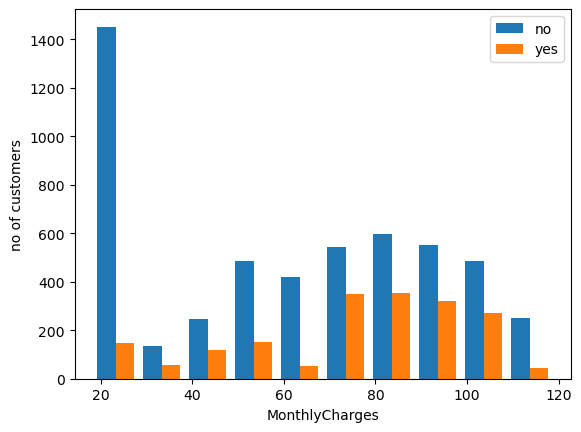

In [33]:
plt.hist([MonthlyCharges0,MonthlyCharges1],label=['no','yes'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('no of customers')
plt.show()

In [34]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


# separate input and output

In [35]:
X=final.drop('Churn',axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,29.85,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,1889.50,0,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,108.15,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,1840.75,0,1,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,0,0,0,1,0,0,0,1,0


In [36]:
y=final.Churn
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Scale columns

In [37]:
scaler=MinMaxScaler()

In [38]:
scaled=scaler.fit_transform(X)
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [39]:
scaled.shape

(7032, 24)

# Use Train_Test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
X_train.shape

(5625, 24)

In [42]:
X_test.shape

(1407, 24)

# crateing One layer

In [43]:
model= keras.Sequential([
    keras.layers.Dense(1, input_shape=(24,), activation='sigmoid')
])

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='Accuracy')

In [45]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


176/176 [==============================] - 2s 2ms/step - loss: 42.0990 - Accuracy: 0.7342
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 1.5952 - Accuracy: 0.6850
Epoch 3/10
176/176 [==============================] - 1s 4ms/step - loss: 0.6653 - Accuracy: 0.6684
Epoch 4/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5436 - Accuracy: 0.7193
Epoch 5/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5424 - Accuracy: 0.7262
Epoch 6/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5194 - Accuracy: 0.7490
Epoch 7/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5288 - Accuracy: 0.7552
Epoch 8/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4878 - Accuracy: 0.7668
Epoch 9/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5007 - Accuracy: 0.7719
Epoch 10/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4713 - Accuracy: 0.7

In [46]:
#model.fit(X_train,y_train,epochs=100)

# creating Two layers

In [47]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(24,), activation='relu',kernel_initializer='ones',bias_initializer='zeros'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='Accuracy')

In [49]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 2s 2ms/step - loss: 30.8584 - Accuracy: 0.6670
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 10.5153 - Accuracy: 0.6996
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 21.0338 - Accuracy: 0.6908
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 9.7087 - Accuracy: 0.7380
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 14.5272 - Accuracy: 0.7125
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 12.2707 - Accuracy: 0.7275
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 11.1350 - Accuracy: 0.7323
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 8.0502 - Accuracy: 0.7465
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 11.1469 - Accuracy: 0.7323
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 14.7524 - Accuracy

In [50]:
#model.fit(X_train,y_train,epochs=100)

In [51]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 3.3665 - Accuracy: 0.7598


[3.366546869277954, 0.759772539138794]

In [52]:
# find the precited value using x test
pred=model.predict(X_test)
pred

44/44 [==============================] - 0s 2ms/step


array([[1.3956758e-13],
       [2.9314397e-02],
       [1.0000000e+00],
       ...,
       [4.4287316e-07],
       [7.5016590e-04],
       [4.5437724e-19]], dtype=float32)

In [53]:
# convert predicted values into 0 & 1 format 
predicted=[]
for i in pred:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [54]:
predicted

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


# plot Confusion Matrix

In [55]:
# Confusion matrix is also present in tensorflow.math
cm= tf.math.confusion_matrix(labels=y_test,predictions=predicted)

<Axes: >

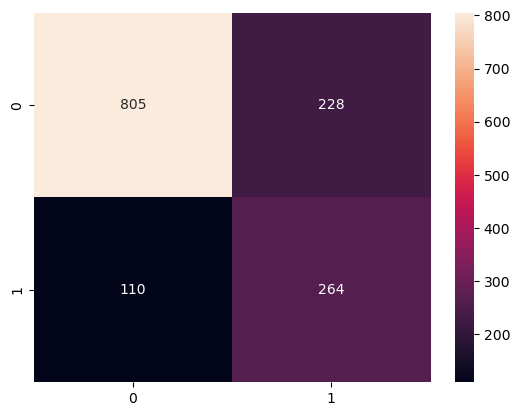

In [56]:
sns.heatmap(cm,annot=True,fmt='d')

In [57]:
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [58]:
# to check 0 and 1 count in churn column
final['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [59]:
df0= final[final['Churn']==0]
df1= final[final['Churn']==1]

In [60]:
df0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
6,1,0,0,1,22,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
7,0,0,0,0,10,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [61]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
8,0,0,1,0,28,1,0,0,1,1,...,1,1,0,0,1,0,0,0,1,0
13,1,0,0,0,49,1,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0


# Undersampling 
undersample the '0' to the value of 1

In [62]:
# sample takes random values from provided axis, just pass n 
# i.e no. of samples required
df0_undersample=df0.sample(1869)

In [63]:
df0_undersample.shape

(1869, 25)

In [64]:
# now we have equal values for both 0 & 1 , therefore merge them
undersample= pd.concat([df0_undersample,df1])

In [65]:
# final balanced data
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2987,0,0,1,1,33,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5827,1,0,1,1,34,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2182,1,0,1,1,56,1,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0
1796,0,0,1,0,23,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2445,0,0,1,1,27,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
undersample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3738 entries, 2987 to 7041
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3738 non-null   int64  
 1   SeniorCitizen                          3738 non-null   int64  
 2   Partner                                3738 non-null   int64  
 3   Dependents                             3738 non-null   int64  
 4   tenure                                 3738 non-null   int64  
 5   PhoneService                           3738 non-null   int64  
 6   OnlineSecurity                         3738 non-null   int64  
 7   OnlineBackup                           3738 non-null   int64  
 8   DeviceProtection                       3738 non-null   int64  
 9   TechSupport                            3738 non-null   int64  
 10  StreamingTV                            3738 non-null   int64  
 11  S

In [67]:
co= undersample[['tenure','MonthlyCharges','TotalCharges']]

In [68]:
undersample[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(co)

In [69]:
undersample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2987,0,0,1,1,0.450704,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5827,1,0,1,1,0.464789,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2182,1,0,1,1,0.774648,1,0,0,1,1,...,0,1,0,0,1,0,1,0,1,0
1796,0,0,1,0,0.309859,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2445,0,0,1,1,0.366197,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(undersample.drop("Churn",axis=1), undersample.Churn, test_size=0.20, random_state=42)

In [71]:
X_train_min.shape

(2990, 24)

In [72]:
X_test_min.shape

(748, 24)

In [73]:
# Creating layer
model=keras.Sequential([
    keras.layers.Dense(1, input_shape=(24,),activation="sigmoid")
])

In [74]:
# Compile the model
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics='Accuracy')

In [75]:
# Fit the model
model.fit(X_train_min,y_train_min,epochs=10)

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.7570 - Accuracy: 0.4823
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.7088 - Accuracy: 0.5341
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.6727 - Accuracy: 0.6017
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.6441 - Accuracy: 0.6441
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.6217 - Accuracy: 0.6732
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.6038 - Accuracy: 0.6910
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5893 - Accuracy: 0.7047
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5774 - Accuracy: 0.7191
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5676 - Accuracy: 0.7241
Epoch 10/10
94/94 [==============================] - 0s 4ms/step - loss: 0.5594 - Accuracy: 0.7291


# Oversampling

In [76]:
sum1, sum0 = final['Churn'].value_counts()

In [77]:
sum1

5163

In [78]:
sum0

1869

In [79]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_1,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,1,0,0,0,2,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
8,0,0,1,0,28,1,0,0,1,1,...,1,1,0,0,1,0,0,0,1,0
13,1,0,0,0,49,1,0,1,1,0,...,1,1,0,0,1,0,0,0,0,0


In [80]:
df1_oversample = df1.sample(sum1, replace=True)

In [81]:
df1_oversample.shape

(5163, 25)

In [82]:
oversample=pd.concat([df0,df1_oversample])

In [111]:
oversample.shape

(10326, 25)

In [112]:
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(oversample.drop("Churn",axis=1), oversample.Churn, test_size=0.20, random_state=42)

In [113]:
X_train_max.shape

(8260, 24)

In [115]:
X_test_max.shape

(2066, 24)

In [118]:
model= keras.Sequential([
    keras.layers.Dense(1, input_shape=(24,), activation='sigmoid')
])

In [119]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics="Accuracy")

In [120]:
model.fit(X_train_max,y_train_max)

259/259 [==============================] - 2s 4ms/step - loss: 227.8951 - Accuracy: 0.5099


In [121]:
model.fit(X_train_max,y_train_max,epochs=10)

Epoch 1/10
259/259 [==============================] - 1s 3ms/step - loss: 43.6101 - Accuracy: 0.6044
Epoch 2/10
259/259 [==============================] - 1s 3ms/step - loss: 3.8533 - Accuracy: 0.6036
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 2.2162 - Accuracy: 0.6477
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.9806 - Accuracy: 0.7113
Epoch 5/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5898 - Accuracy: 0.7231
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5498 - Accuracy: 0.7309
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5458 - Accuracy: 0.7316
Epoch 8/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5293 - Accuracy: 0.7406
Epoch 9/10
259/259 [==============================] - 1s 3ms/step - loss: 0.5389 - Accuracy: 0.7410
Epoch 10/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5349 - Accuracy: 0.744

# SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote= SMOTE(sampling_strategy='minority')

In [90]:
X=final.drop("Churn",axis=1)

In [91]:
y=final.Churn

In [94]:
X_sm,y_sm= smote.fit_resample(X,y)

In [95]:
X_sm.shape

(10326, 24)

In [96]:
y_sm.shape

(10326,)

In [98]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [99]:
X_train_sm.shape

(8260, 24)

In [100]:
X_test_sm.shape

(2066, 24)

In [108]:
model= keras.Sequential([
    keras.layers.Dense(1, input_shape=(24,), activation="sigmoid")
])

In [109]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [110]:
model.fit(X_train_sm,y_train_sm,epochs=10)

Epoch 1/10
259/259 [==============================] - 2s 4ms/step - loss: 3.0349 - Accuracy: 0.6288
Epoch 2/10
259/259 [==============================] - 1s 4ms/step - loss: 0.8319 - Accuracy: 0.7173
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.5137 - Accuracy: 0.7573
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4942 - Accuracy: 0.7707
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4778 - Accuracy: 0.7781
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4636 - Accuracy: 0.7812
Epoch 7/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4494 - Accuracy: 0.7913
Epoch 8/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4515 - Accuracy: 0.7904
Epoch 9/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4407 - Accuracy: 0.7956
Epoch 10/10
259/259 [==============================] - 1s 5ms/step - loss: 0.4395 - Accuracy: 0.7939